In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind

In [2]:
# STEP 1 - Load the data with proper headers
df_raw = pd.read_csv("Data1.csv", sep=";")

In [3]:
# STEP 2 - Fix headers manually using first row
df_raw.columns = df_raw.iloc[0]
df = df_raw[1:].copy()

In [4]:
# STEP 3 - Rename columns (optional, to avoid issues with spaces)
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [5]:
# STEP 4 - Convert numeric columns to correct types
numeric_cols = [
    "Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT",
    "Crop_Yield_MT_per_HA", "Extreme_Weather_Events", "Irrigation_Access_%",
    "Soil_Health_Index"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with any missing numeric values
df.dropna(subset=numeric_cols, inplace=True)

<ipython-input-6-0840d24b6df5>:16: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-0840d24b6df5>:16: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


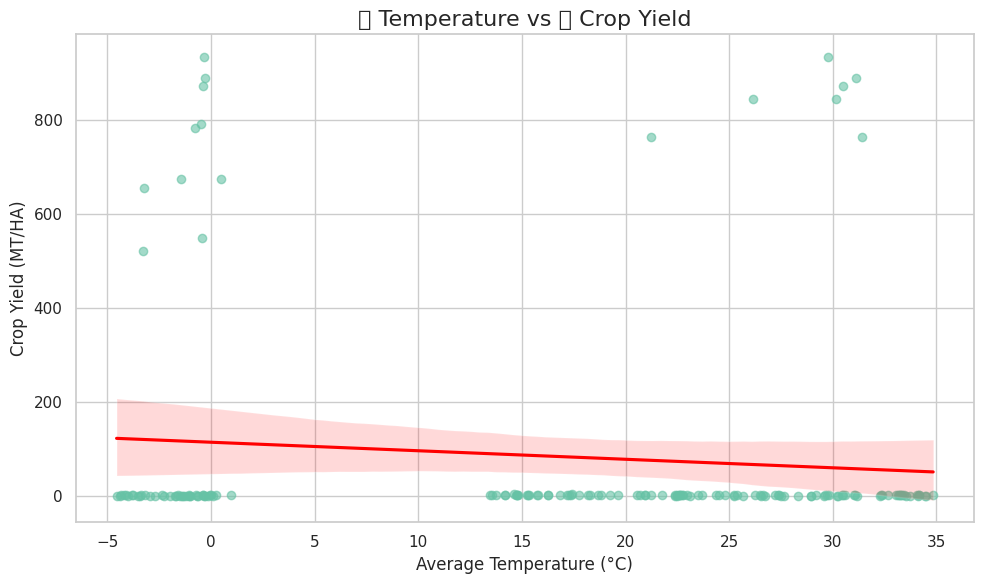

<ipython-input-6-0840d24b6df5>:26: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-0840d24b6df5>:26: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


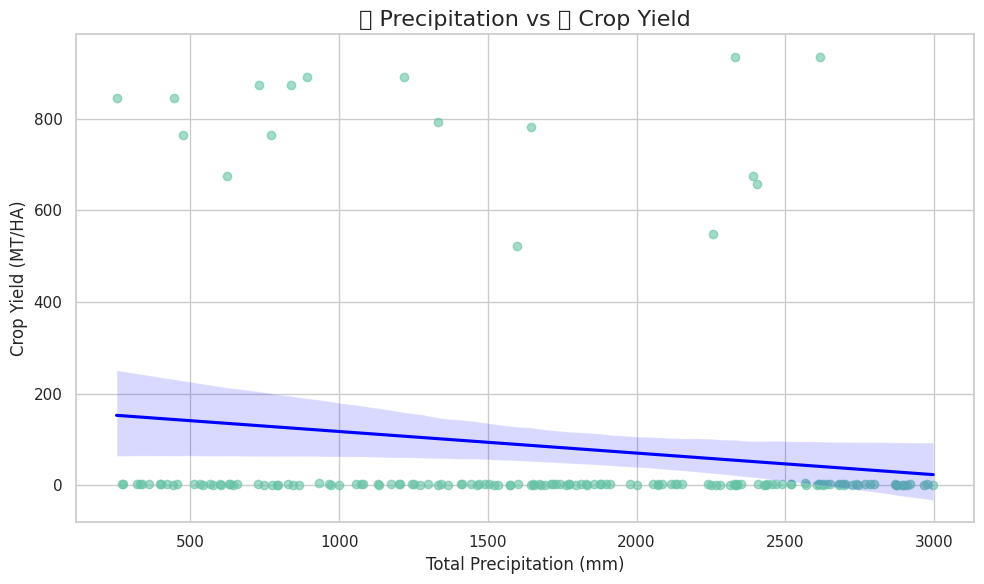

<ipython-input-6-0840d24b6df5>:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


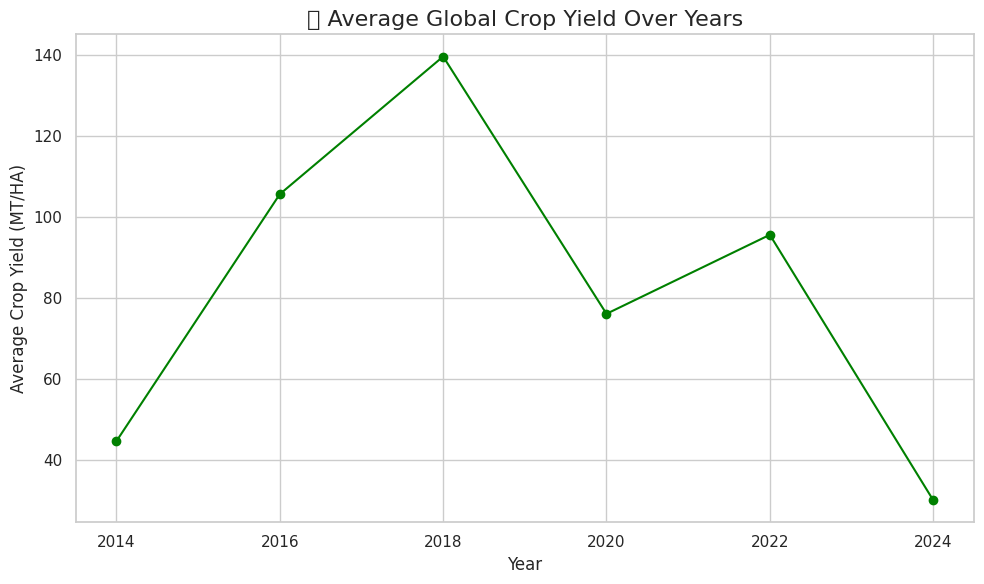

<ipython-input-6-0840d24b6df5>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Region", y="Crop_Yield_MT_per_HA", estimator=np.mean, ci=None)
<ipython-input-6-0840d24b6df5>:47: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


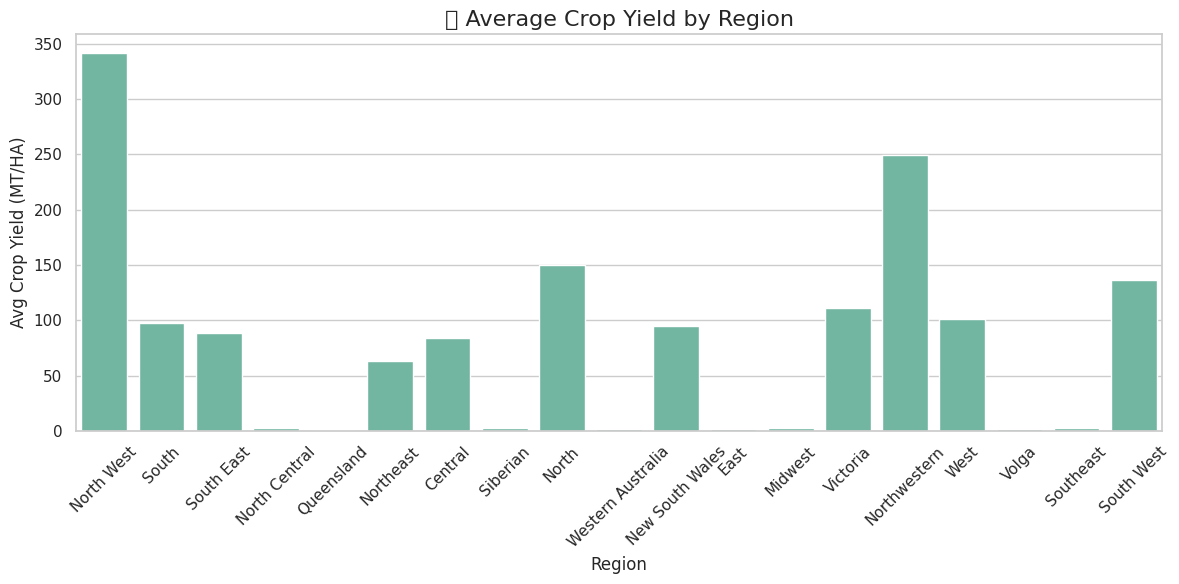

<ipython-input-6-0840d24b6df5>:58: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


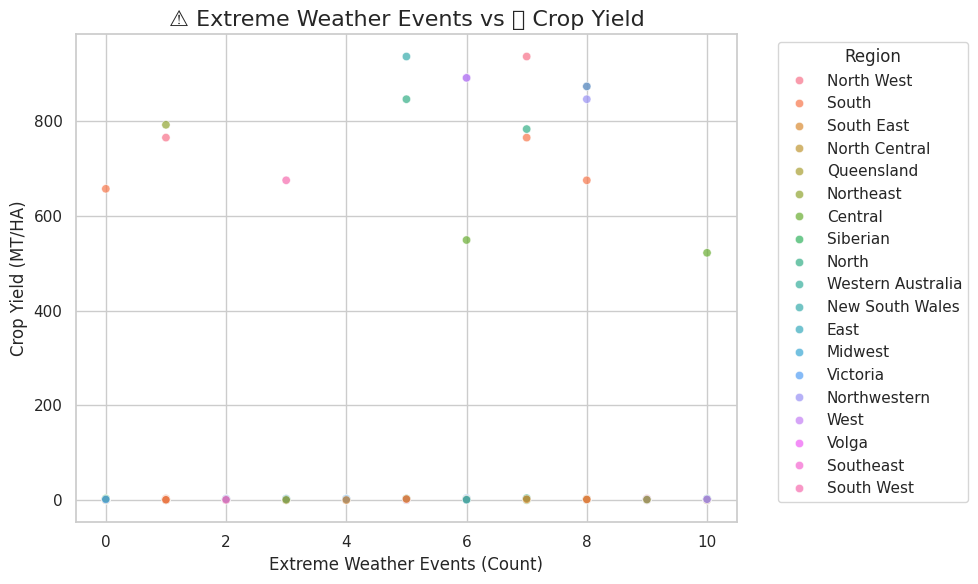

<ipython-input-6-0840d24b6df5>:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


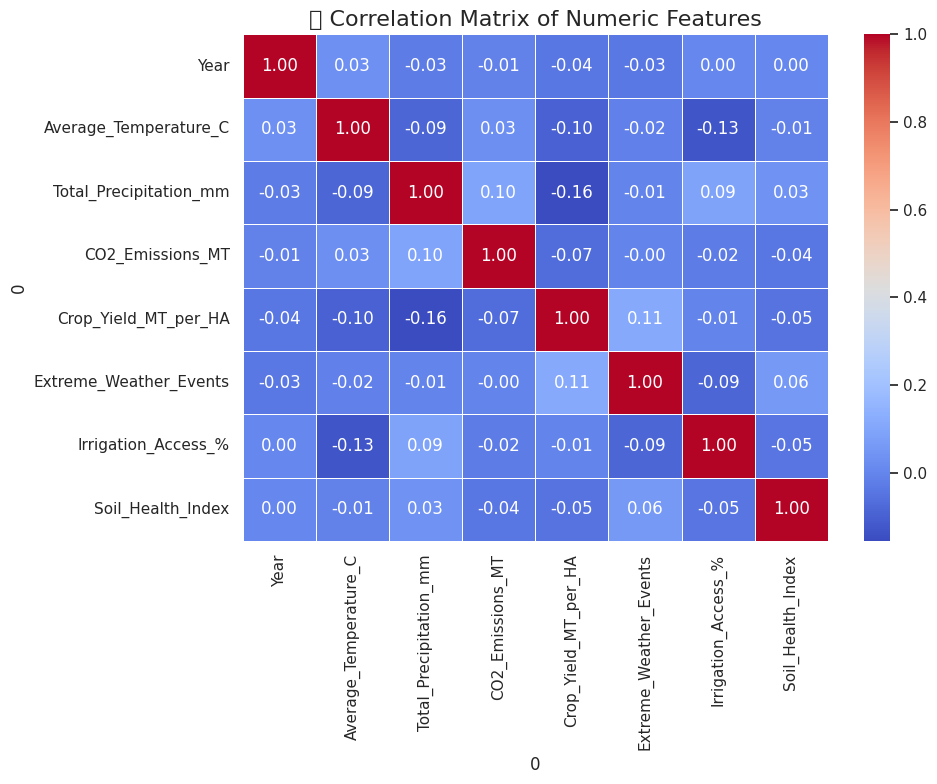

<ipython-input-6-0840d24b6df5>:74: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


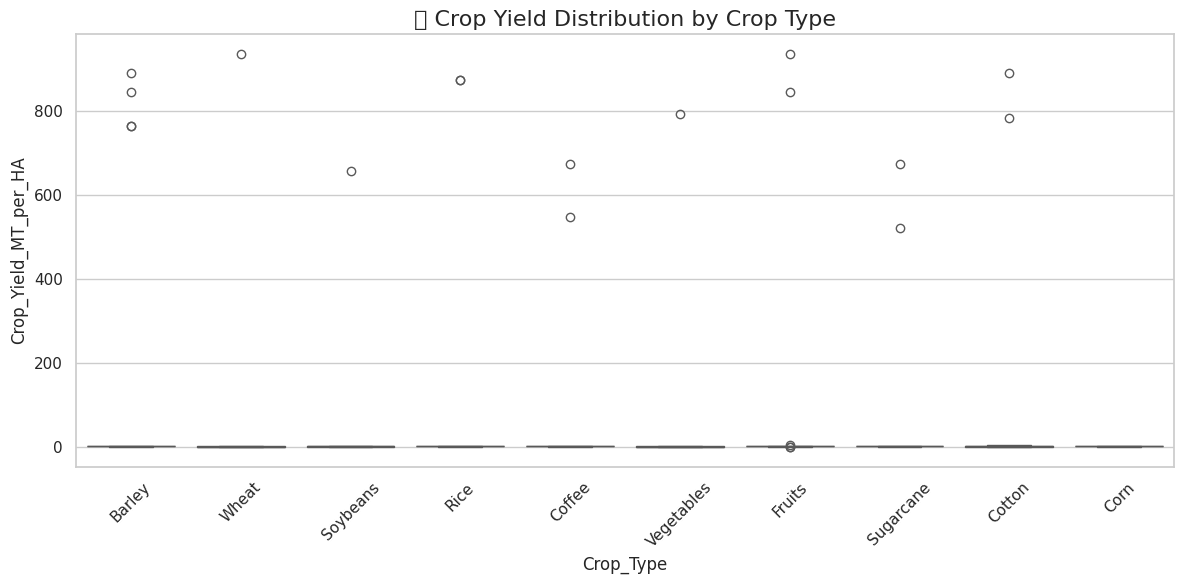

<ipython-input-6-0840d24b6df5>:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


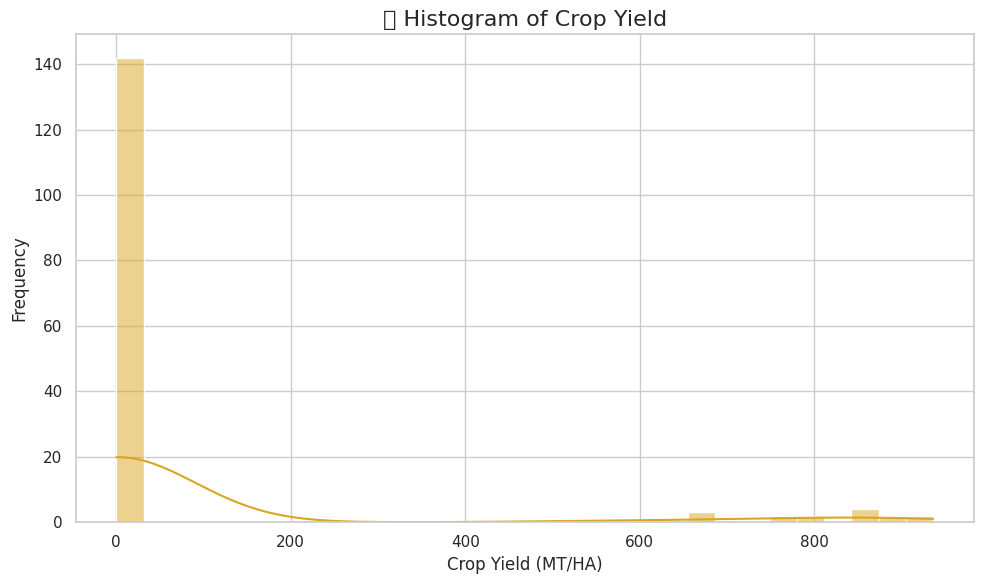

In [6]:
# STEP 5 – EDA plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2")

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 1. Temperature vs Crop Yield
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Average_Temperature_C", y="Crop_Yield_MT_per_HA",
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("🌡️ Temperature vs 🌾 Crop Yield", fontsize=16)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crop Yield (MT/HA)")
plt.tight_layout()
plt.show()

# 2. Precipitation vs Crop Yield
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Total_Precipitation_mm", y="Crop_Yield_MT_per_HA",
            scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title("🌧️ Precipitation vs 🌾 Crop Yield", fontsize=16)
plt.xlabel("Total Precipitation (mm)")
plt.ylabel("Crop Yield (MT/HA)")
plt.tight_layout()
plt.show()

# 3. Average Crop Yield Over Years
avg_yield_by_year = df.groupby("Year")["Crop_Yield_MT_per_HA"].mean()
plt.figure(figsize=(10, 6))
avg_yield_by_year.plot(marker="o", linestyle='-', color='green')
plt.title("📈 Average Global Crop Yield Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Crop Yield (MT/HA)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Average Crop Yield by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Region", y="Crop_Yield_MT_per_HA", estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title("🌍 Average Crop Yield by Region", fontsize=16)
plt.xlabel("Region")
plt.ylabel("Avg Crop Yield (MT/HA)")
plt.tight_layout()
plt.show()

# 5. Extreme Weather Events vs Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Extreme_Weather_Events", y="Crop_Yield_MT_per_HA",
                hue="Region", alpha=0.7)
plt.title("⚠️ Extreme Weather Events vs 🌾 Crop Yield", fontsize=16)
plt.xlabel("Extreme Weather Events (Count)")
plt.ylabel("Crop Yield (MT/HA)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Correlation Heatmap of Numeric Features
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Correlation Matrix of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# 7. Boxplot of Crop Yield by Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Crop_Type", y="Crop_Yield_MT_per_HA")
plt.xticks(rotation=45)
plt.title("🌾 Crop Yield Distribution by Crop Type", fontsize=16)
plt.tight_layout()
plt.show()

# 8. Histogram of Crop Yield
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Crop_Yield_MT_per_HA", bins=30, kde=True, color="goldenrod")
plt.title("📊 Histogram of Crop Yield", fontsize=16)
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# STEP 6 - Regression Analysis
features = ["Average_Temperature_C", "Total_Precipitation_mm", "CO2_Emissions_MT", "Extreme_Weather_Events"]
X = df[features]
y = df["Crop_Yield_MT_per_HA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nRegression Coefficients:")
for f, coef in zip(features, model.coef_):
    print(f"{f}: {coef:.3f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.3f}")



Regression Coefficients:
Average_Temperature_C: -2.276
Total_Precipitation_mm: -0.061
CO2_Emissions_MT: -2.937
Extreme_Weather_Events: 8.941
R^2 Score: -0.065


In [8]:
# STEP 7 - Hypothesis Testing: Irrigation effect
median_irrigation = df["Irrigation_Access_%"].median()
high_irrigation = df[df["Irrigation_Access_%"] > median_irrigation]["Crop_Yield_MT_per_HA"]
low_irrigation = df[df["Irrigation_Access_%"] <= median_irrigation]["Crop_Yield_MT_per_HA"]

stat, p = ttest_ind(high_irrigation, low_irrigation, equal_var=False)
print("\nT-Test Results:")
print(f"T-statistic: {stat:.3f}, p-value: {p:.3f}")
if p < 0.05:
    print("There is a statistically significant difference in crop yields.")
else:
    print("No statistically significant difference in crop yields.")


T-Test Results:
T-statistic: 0.117, p-value: 0.907
No statistically significant difference in crop yields.
